In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
features = ['neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [4]:
df = df[features]

In [5]:
df['neighbourhood_group'].mode()

0    Manhattan
dtype: object

In [6]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [7]:
my_dict = {}
for i in df['neighbourhood_group']:
    if i in my_dict:
        my_dict[i] +=1
    else:
        my_dict[i] =1
    

In [8]:
my_dict

{'Brooklyn': 20104,
 'Manhattan': 21661,
 'Queens': 5666,
 'Staten Island': 373,
 'Bronx': 1091}

In [9]:
df.isna().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
df['reviews_per_month'].mean()

1.3732214298586618

In [11]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

C:\Users\msmoh\AppData\Local\Temp/ipykernel_18352/592843096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())


### Scaling

In [12]:
numerics = ['latitude',
'longitude',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [13]:
df_num = df[numerics]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num)
df_numerics = scaler.transform(df_num)

In [15]:
df_numerics = pd.DataFrame(data=df_numerics,  columns=numerics)

In [16]:
df_numerics

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-1.493849,-0.437652,-0.293996,-0.320414,-0.776641,-0.034716,1.916250
1,0.452436,-0.684639,-0.293996,0.487665,-0.663138,-0.156104,1.840275
2,1.468399,0.222497,-0.196484,-0.522433,0.000000,-0.186451,1.916250
3,-0.803398,-0.164450,-0.293996,5.538156,2.181110,-0.186451,0.617065
4,1.275660,0.177216,0.144807,-0.320414,-0.850084,-0.186451,-0.856865
...,...,...,...,...,...,...,...
48890,-0.924616,0.048089,-0.245240,-0.522433,0.000000,-0.156104,-0.788486
48891,-0.497141,0.411637,-0.147729,-0.522433,0.000000,-0.156104,-0.583352
48892,1.573480,0.075821,0.144807,-0.522433,0.000000,-0.186451,-0.651730
48893,0.523774,-0.843881,-0.293996,-0.522433,0.000000,-0.034716,-0.841669


### One hot Encoding

In [17]:
hot_list = ['neighbourhood_group', 'room_type']
df_train_dummies = pd.get_dummies(df[hot_list])
df_train_dummies

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
48890,0,1,0,0,0,0,1,0
48891,0,1,0,0,0,0,1,0
48892,0,0,1,0,0,1,0,0
48893,0,0,1,0,0,0,0,1


In [18]:
df = df.drop(hot_list, axis =1)

In [19]:
df_hot_scaled = df_numerics.join(df_train_dummies)

In [20]:
df_hot_scaled.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-1.493849,-0.437652,-0.293996,-0.320414,-0.776641,-0.034716,1.916250,0,1,0,0,0,0,1,0
1,0.452436,-0.684639,-0.293996,0.487665,-0.663138,-0.156104,1.840275,0,0,1,0,0,1,0,0
2,1.468399,0.222497,-0.196484,-0.522433,0.000000,-0.186451,1.916250,0,0,1,0,0,0,1,0
3,-0.803398,-0.164450,-0.293996,5.538156,2.181110,-0.186451,0.617065,0,1,0,0,0,1,0,0
4,1.275660,0.177216,0.144807,-0.320414,-0.850084,-0.186451,-0.856865,0,0,1,0,0,1,0,0


In [21]:
df_cleaned = df_hot_scaled.join(df.price)

In [22]:
df_cleaned.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
0,-1.493849,-0.437652,-0.293996,-0.320414,-0.776641,-0.034716,1.916250,0,1,0,0,0,0,1,0,149
1,0.452436,-0.684639,-0.293996,0.487665,-0.663138,-0.156104,1.840275,0,0,1,0,0,1,0,0,225
2,1.468399,0.222497,-0.196484,-0.522433,0.000000,-0.186451,1.916250,0,0,1,0,0,0,1,0,150
3,-0.803398,-0.164450,-0.293996,5.538156,2.181110,-0.186451,0.617065,0,1,0,0,0,1,0,0,89
4,1.275660,0.177216,0.144807,-0.320414,-0.850084,-0.186451,-0.856865,0,0,1,0,0,1,0,0,80


### Split train ,val and Test

In [23]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_cleaned, test_size=0.4, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.5, random_state=1)

In [24]:
len(df_train), len(df_val), len(df_test)

(14668, 14669, 19558)

In [25]:
corrMatrix = df_train.corr()
corrMatrix

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
latitude,1.000000,0.092211,0.013843,-0.013152,0.002602,0.020863,-0.006151,0.332071,-0.675290,0.586847,0.027551,-0.187467,-0.001614,0.004520,-0.009346,0.039516
longitude,0.092211,1.000000,-0.073783,0.055217,0.109612,-0.121034,0.081438,0.222668,0.015529,-0.431412,0.619365,-0.291970,-0.201962,0.190617,0.038769,-0.141122
minimum_nights,0.013843,-0.073783,1.000000,-0.083412,-0.090251,0.134699,0.152873,-0.022114,-0.038326,0.067533,-0.035629,0.001006,0.073118,-0.078193,0.015546,0.020518
number_of_reviews,-0.013152,0.055217,-0.083412,1.000000,0.516295,-0.075130,0.162285,0.007009,0.020385,-0.048644,0.034236,0.023511,-0.014099,0.020605,-0.020806,-0.050435
reviews_per_month,0.002602,0.109612,-0.090251,0.516295,1.000000,-0.001563,0.157769,0.045186,-0.044048,-0.038235,0.097682,0.029804,-0.048176,0.046016,0.007486,-0.015891
calculated_host_listings_count,0.020863,-0.121034,0.134699,-0.075130,-0.001563,1.000000,0.233844,-0.023459,-0.127880,0.159477,-0.035692,-0.013689,0.114656,-0.110783,-0.013738,0.059633
availability_365,-0.006151,0.081438,0.152873,0.162285,0.157769,0.233844,1.000000,0.063333,-0.080341,0.001038,0.077720,0.054154,-0.012594,-0.006215,0.060735,0.079168
neighbourhood_group_Bronx,0.332071,0.222668,-0.022114,0.007009,0.045186,-0.023459,0.063333,1.000000,-0.127072,-0.133426,-0.054964,-0.013305,-0.046975,0.035079,0.038841,-0.046192
neighbourhood_group_Brooklyn,-0.675290,0.015529,-0.038326,0.020385,-0.044048,-0.127880,-0.080341,-0.127072,1.000000,-0.743569,-0.306307,-0.074148,-0.085187,0.086821,-0.004328,-0.105691
neighbourhood_group_Manhattan,0.586847,-0.431412,0.067533,-0.048644,-0.038235,0.159477,0.001038,-0.133426,-0.743569,1.000000,-0.321621,-0.077855,0.170458,-0.162649,-0.027031,0.174701


In [26]:
corrMatrixx = corrMatrix.unstack()
s = corrMatrixx.sort_values(kind="quicksort", ascending = False)
s[:20]

latitude                           latitude                             1.000000
longitude                          longitude                            1.000000
room_type_Shared room              room_type_Shared room                1.000000
room_type_Private room             room_type_Private room               1.000000
room_type_Entire home/apt          room_type_Entire home/apt            1.000000
neighbourhood_group_Staten Island  neighbourhood_group_Staten Island    1.000000
neighbourhood_group_Queens         neighbourhood_group_Queens           1.000000
neighbourhood_group_Manhattan      neighbourhood_group_Manhattan        1.000000
neighbourhood_group_Brooklyn       neighbourhood_group_Brooklyn         1.000000
neighbourhood_group_Bronx          neighbourhood_group_Bronx            1.000000
availability_365                   availability_365                     1.000000
calculated_host_listings_count     calculated_host_listings_count       1.000000
reviews_per_month           

In [27]:
def aboveavg(i):
    if i >= 152:
        i = 1
    else:
        i = 0
    return i


In [28]:
df_train['price'] = df_train['price'].apply(lambda x : aboveavg(x))

C:\Users\msmoh\AppData\Local\Temp/ipykernel_18352/2711516352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['price'] = df_train['price'].apply(lambda x : aboveavg(x))


In [29]:
df_test['price'] = df_test['price'].apply(lambda x : aboveavg(x))

C:\Users\msmoh\AppData\Local\Temp/ipykernel_18352/2715527474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['price'] = df_test['price'].apply(lambda x : aboveavg(x))


In [30]:
df_val['price'] = df_val['price'].apply(lambda x : aboveavg(x))

C:\Users\msmoh\AppData\Local\Temp/ipykernel_18352/2107219859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['price'] = df_val['price'].apply(lambda x : aboveavg(x))


In [31]:
df_train['price']

47719    0
48893    0
23198    1
2149     0
21377    0
        ..
13181    0
7750     1
11966    0
8160     0
31223    0
Name: price, Length: 14668, dtype: int64

In [32]:
df_train.dtypes

latitude                             float64
longitude                            float64
minimum_nights                       float64
number_of_reviews                    float64
reviews_per_month                    float64
calculated_host_listings_count       float64
availability_365                     float64
neighbourhood_group_Bronx              uint8
neighbourhood_group_Brooklyn           uint8
neighbourhood_group_Manhattan          uint8
neighbourhood_group_Queens             uint8
neighbourhood_group_Staten Island      uint8
room_type_Entire home/apt              uint8
room_type_Private room                 uint8
room_type_Shared room                  uint8
price                                  int64
dtype: object

In [33]:
from sklearn.metrics import mutual_info_score

In [34]:
ms1 = mutual_info_score(df_train.price, df_train.neighbourhood_group)
round(ms1,2)

AttributeError: 'DataFrame' object has no attribute 'neighbourhood_group'

In [35]:
ms2 = mutual_info_score(df_train.price, df_train.room_type)
round(ms2,2)

AttributeError: 'DataFrame' object has no attribute 'room_type'

### Final Splotting

In [36]:
X_train = df_train.drop('price', axis = 1)
y_train = df_train['price']

In [37]:
X_test = df_test.drop('price', axis = 1)
y_test = df_test['price']

In [38]:
X_val = df_val.drop('price', axis = 1)
y_val = df_val['price']

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter =10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [40]:
score = model.score(X_val, y_val)
print(score)

0.8014861272070353


In [43]:
from featurewiz import featurewiz

Imported featurewiz: advanced feature engg and selection library. Version=0.0.42
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (14668, 16)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    15 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No GPU active on this device
    Running XGBoost using CPU parameters
Removing 0 columns from further processing since ID or low information variables
    columns removed: []
    After removing redundant variables from further processing, features left = 15
#### Single_Label Binary_Classification Feature Selection Started ####
Searching for highly correlated variables from 15 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time..

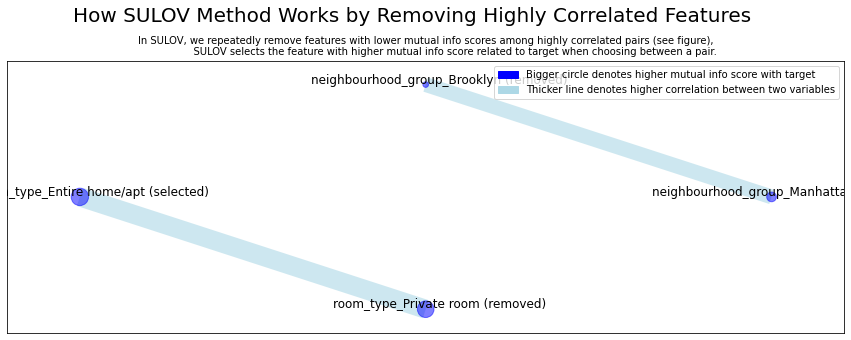

    Adding 0 categorical variables to reduced numeric variables  of 13
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 13 
    Finding Important Features using Boosted Trees algorithm...
        using 13 variables...
        using 10 variables...
        using 7 variables...
        using 4 variables...
        using 1 variables...
Selected 13 important features from your dataset
    Time taken (in seconds) = 40
Returning list of 13 important features and dataframe.


In [44]:
target = 'price'
 
features, train = featurewiz(df_train, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [52]:
numerics

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [53]:
num = ['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365', 'price']

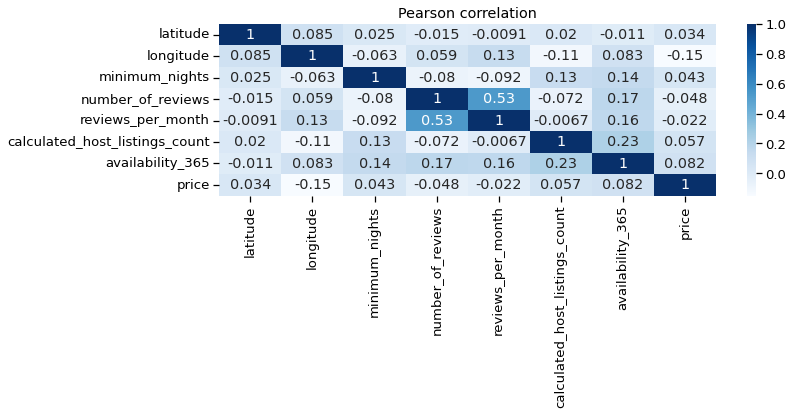

In [54]:
#To find corelation betweeen variables:
plt.figure(figsize=(12,6))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df[num].corr('pearson'),annot=True,cmap='Blues');
plt.title('Pearson correlation');
plt.tight_layout();

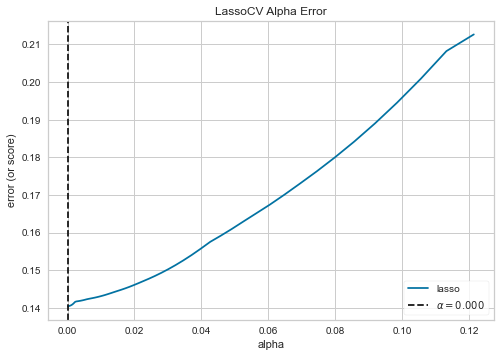

AlphaSelection(ax=<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>,
               estimator=LassoCV(random_state=42))

In [67]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor.alphas import alphas

from yellowbrick.datasets import load_energy


alphas(LassoCV(random_state=42), X_train, y_train)